# Nonparametric Regression

Given a sample $(X_i,Y_i)_{i=1,\dots,n}$ the regression function is defined by

$$ f(x) := \mathbb{E}[Y_i | X_i = x] $$ 

or equivalent

$$ Y_i = f(x_i) + \epsilon_i \qquad i = 1, \dots , n $$

Goal is the statistical inference of the Regressionfunction f. 

## Local polynomial Estimator


 The Nadaraya-Watson estimator is given by

$$ \hat{f_{nh}^{NW}}(x) = \frac{\sum_{i=1}^{n}K_{h}(x-x_{i})y_{i}}{\sum_{i=1}^{n}K_{h}(x-x_{i})} $$



First we import some libraries


In [2]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import pandas as pd  


    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

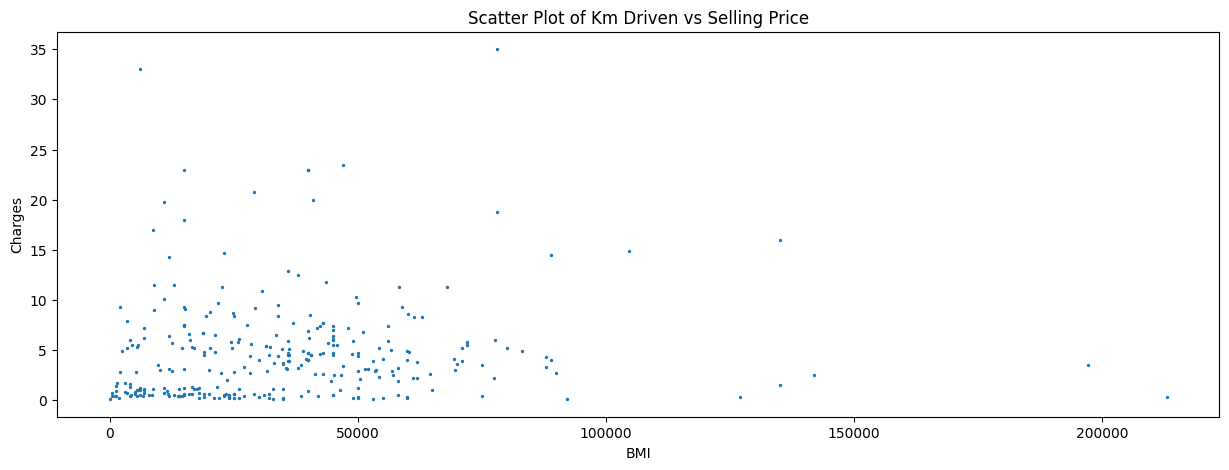

In [24]:
df = pd.read_csv('D:\DataForPython\cardata.csv')
print(df)

X = df['Kms_Driven']
Y = df['Selling_Price']

X = np.where(np.logical_and(X < 300000, X> 0), X, 0)

plt.figure(figsize=(15,5))
plt.scatter(X,Y,s=2)
plt.title('Scatter Plot of Km Driven vs Selling Price')
plt.xlabel('BMI')
plt.ylabel('Charges')
Number_samples = len(X)


Next we want to sample some random data points which are given by random variables X and Y. We assume the following relationship 

$\mathbb{E}[Y|X=x] = m(x) $

In this example we assume the Covariance random variables X to be exponential distributed and the response random variables Y to be gamma distributed with parameter = 10.

The samples can be generated via numpy library and be visualized.

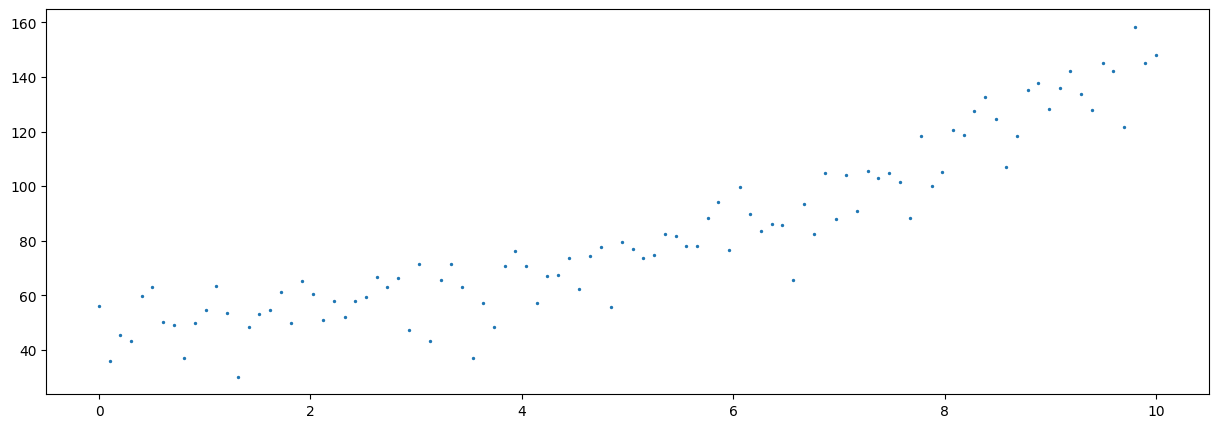

In [9]:
Number_samples = 100

X = np.linspace(0,10,Number_samples)
e = np.random.normal(0,10,size= Number_samples)
Y = X**2 + e + 50
plt.figure(figsize=(15,5))
plt.scatter(X,Y, s=2) 

Next the Kernel function K and the extension with the bandwith h is defined. Furthermore the Nadaraya-Watson kernel estimator is defined. 

Next different kernel functions K are implemented. 

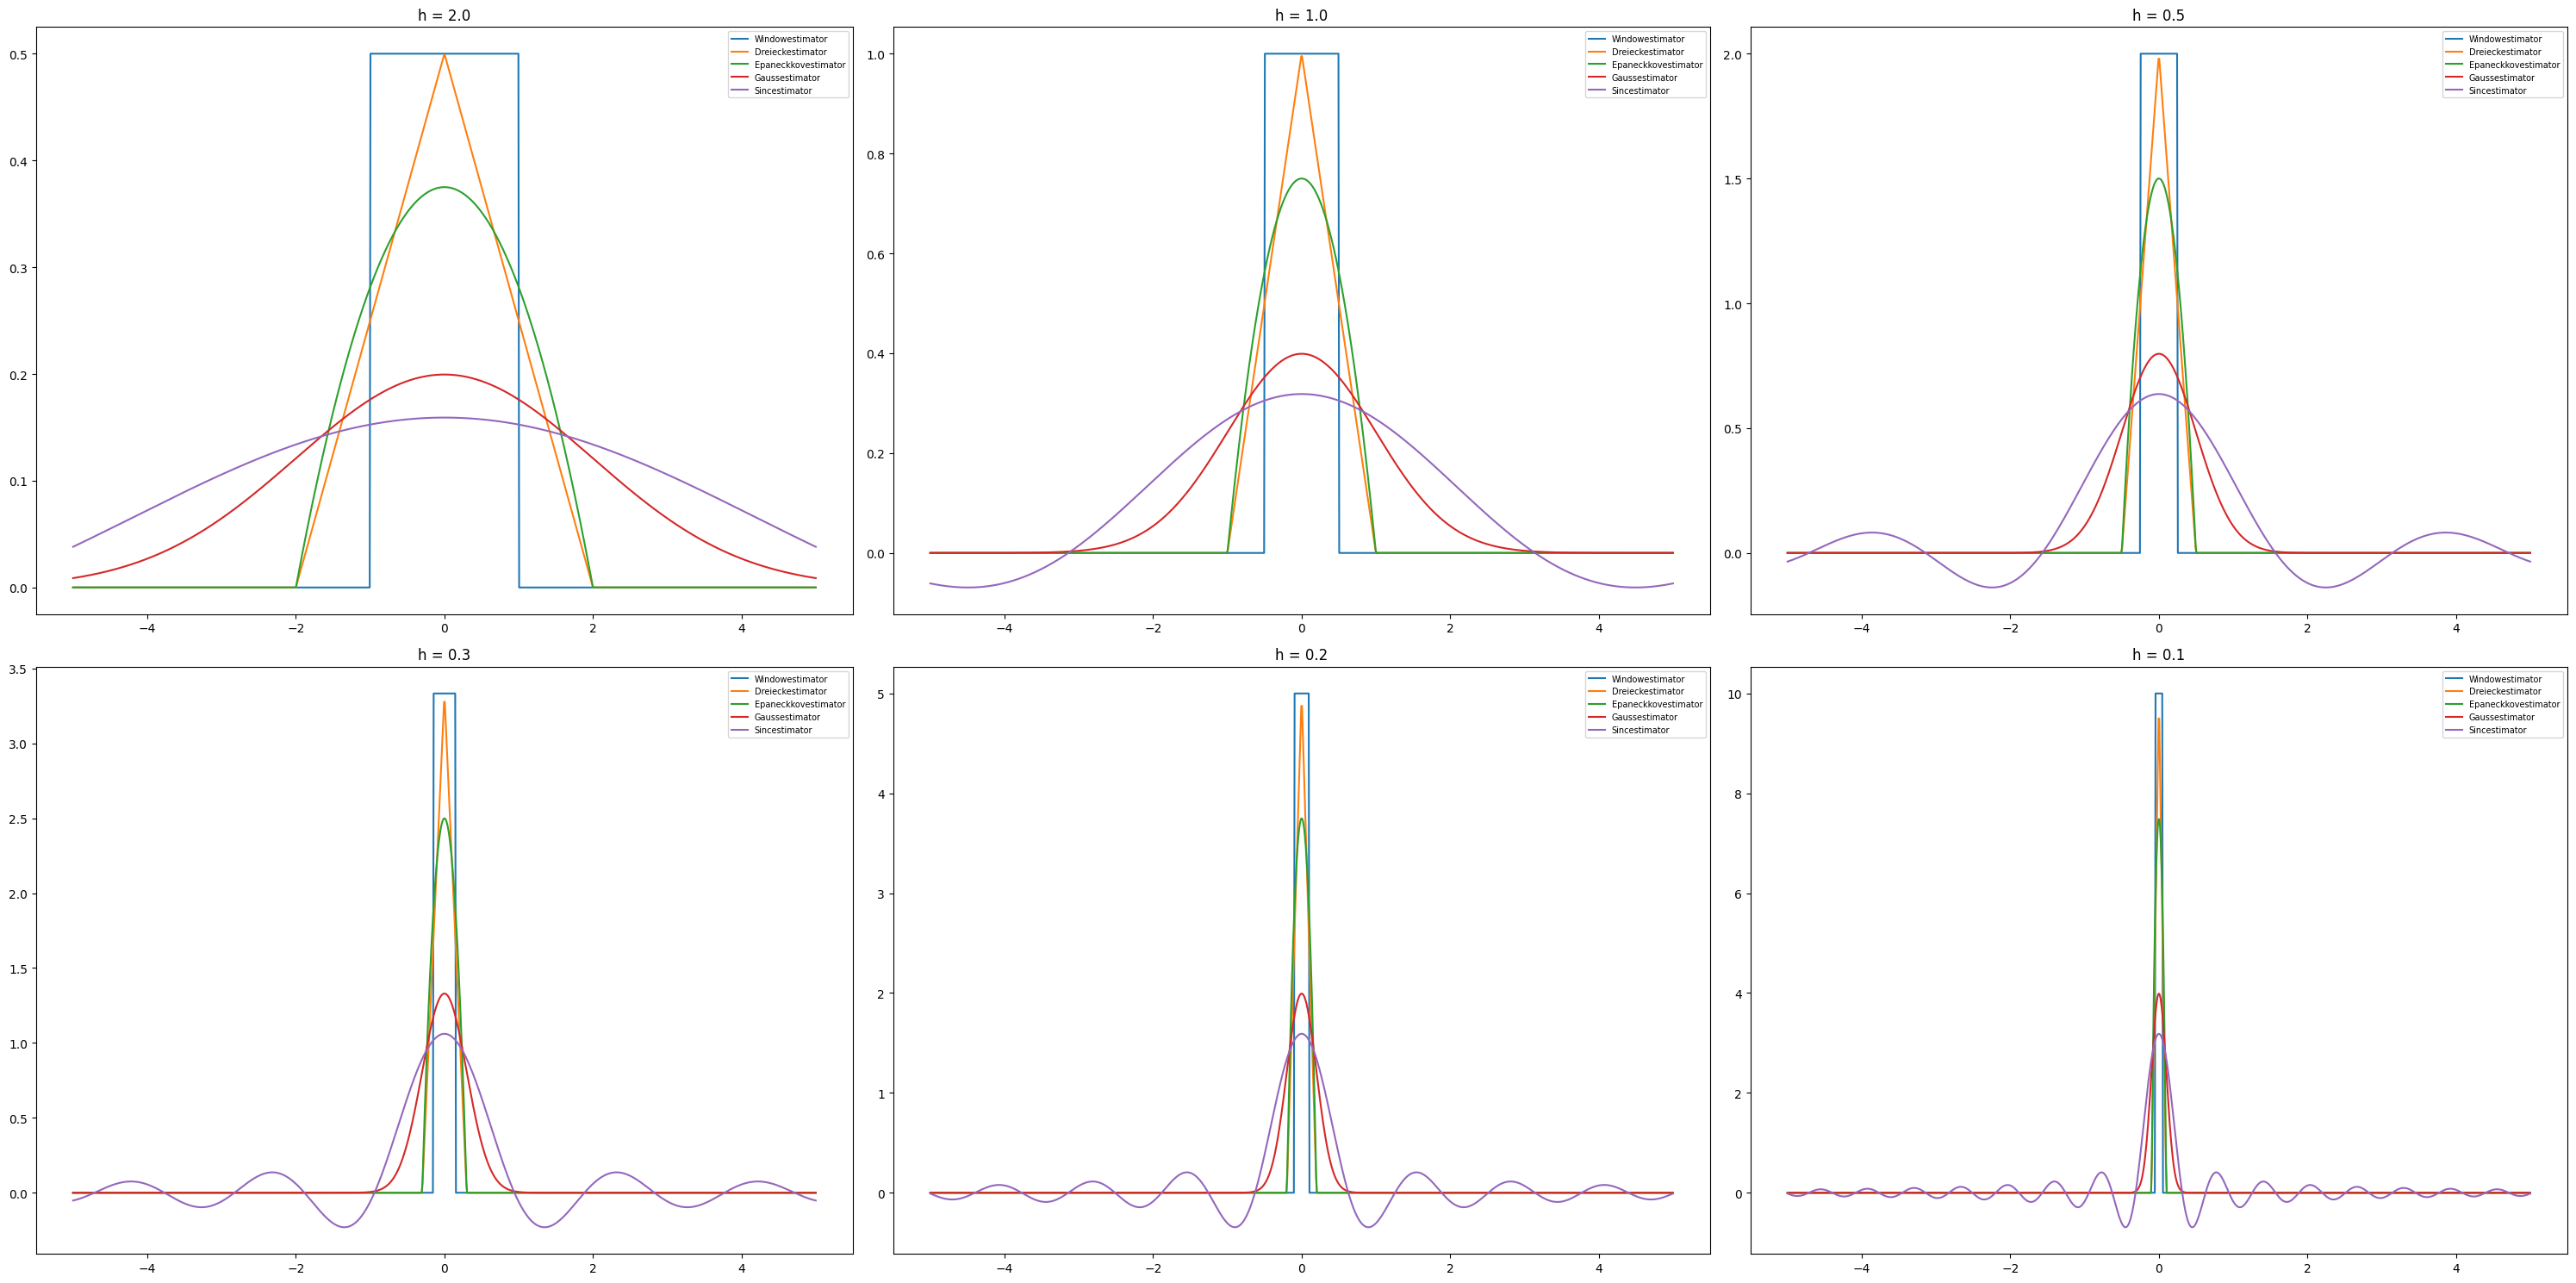

In [27]:
def K_Fenster(x,h):
    return 1/h * np.where(np.logical_and(x/h >= -0.5, x/h <= 0.5), 1, 0)

def K_Dreieck(x,h):
    return 1/h * np.where(np.logical_and(x/h > - 1, x/h < 1), 1 - np.abs(x/h), 0)

def K_Epa(x,h):
    return 1/h * np.where(np.logical_and(x/h > -1, x/h < 1), (3/4)*(1-(x/h)**2),0)

def K_Gauß(x,h):
    return 1/h * (2*np.pi)**(-0.5)*np.exp(-0.5 * np.abs(x/h)**2)

def K_sinc(x,h):
    return 1/(h*np.pi) * (np.sin(x/h)/(x/h))


h = np.array([2, 1, 0.5, 0.3, 0.2, 0.1])
x = np.linspace(-5,5, 1000)

plt.figure(figsize=(30,15), layout = 'tight')
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(x, K_Fenster(x,h[i]), label = 'Windowestimator')
    plt.plot(x,K_Dreieck(x,h[i]), label = 'Dreieckestimator')
    plt.plot(x, K_Epa(x,h[i]), label = 'Epaneckkovestimator')
    plt.plot(x, K_Gauß(x,h[i]), label = 'Gaussestimator')
    plt.plot(x, K_sinc(x,h[i]), label = 'Sincestimator')
    plt.title(f"h = {h[i]}")
    plt.legend(fontsize = 7)



C:\Users\simon\AppData\Local\Temp\ipykernel_2468\3791353751.py:14: RuntimeWarning: invalid value encountered in divide
  return 1/(h*np.pi) * (np.sin(x/h)/(x/h))


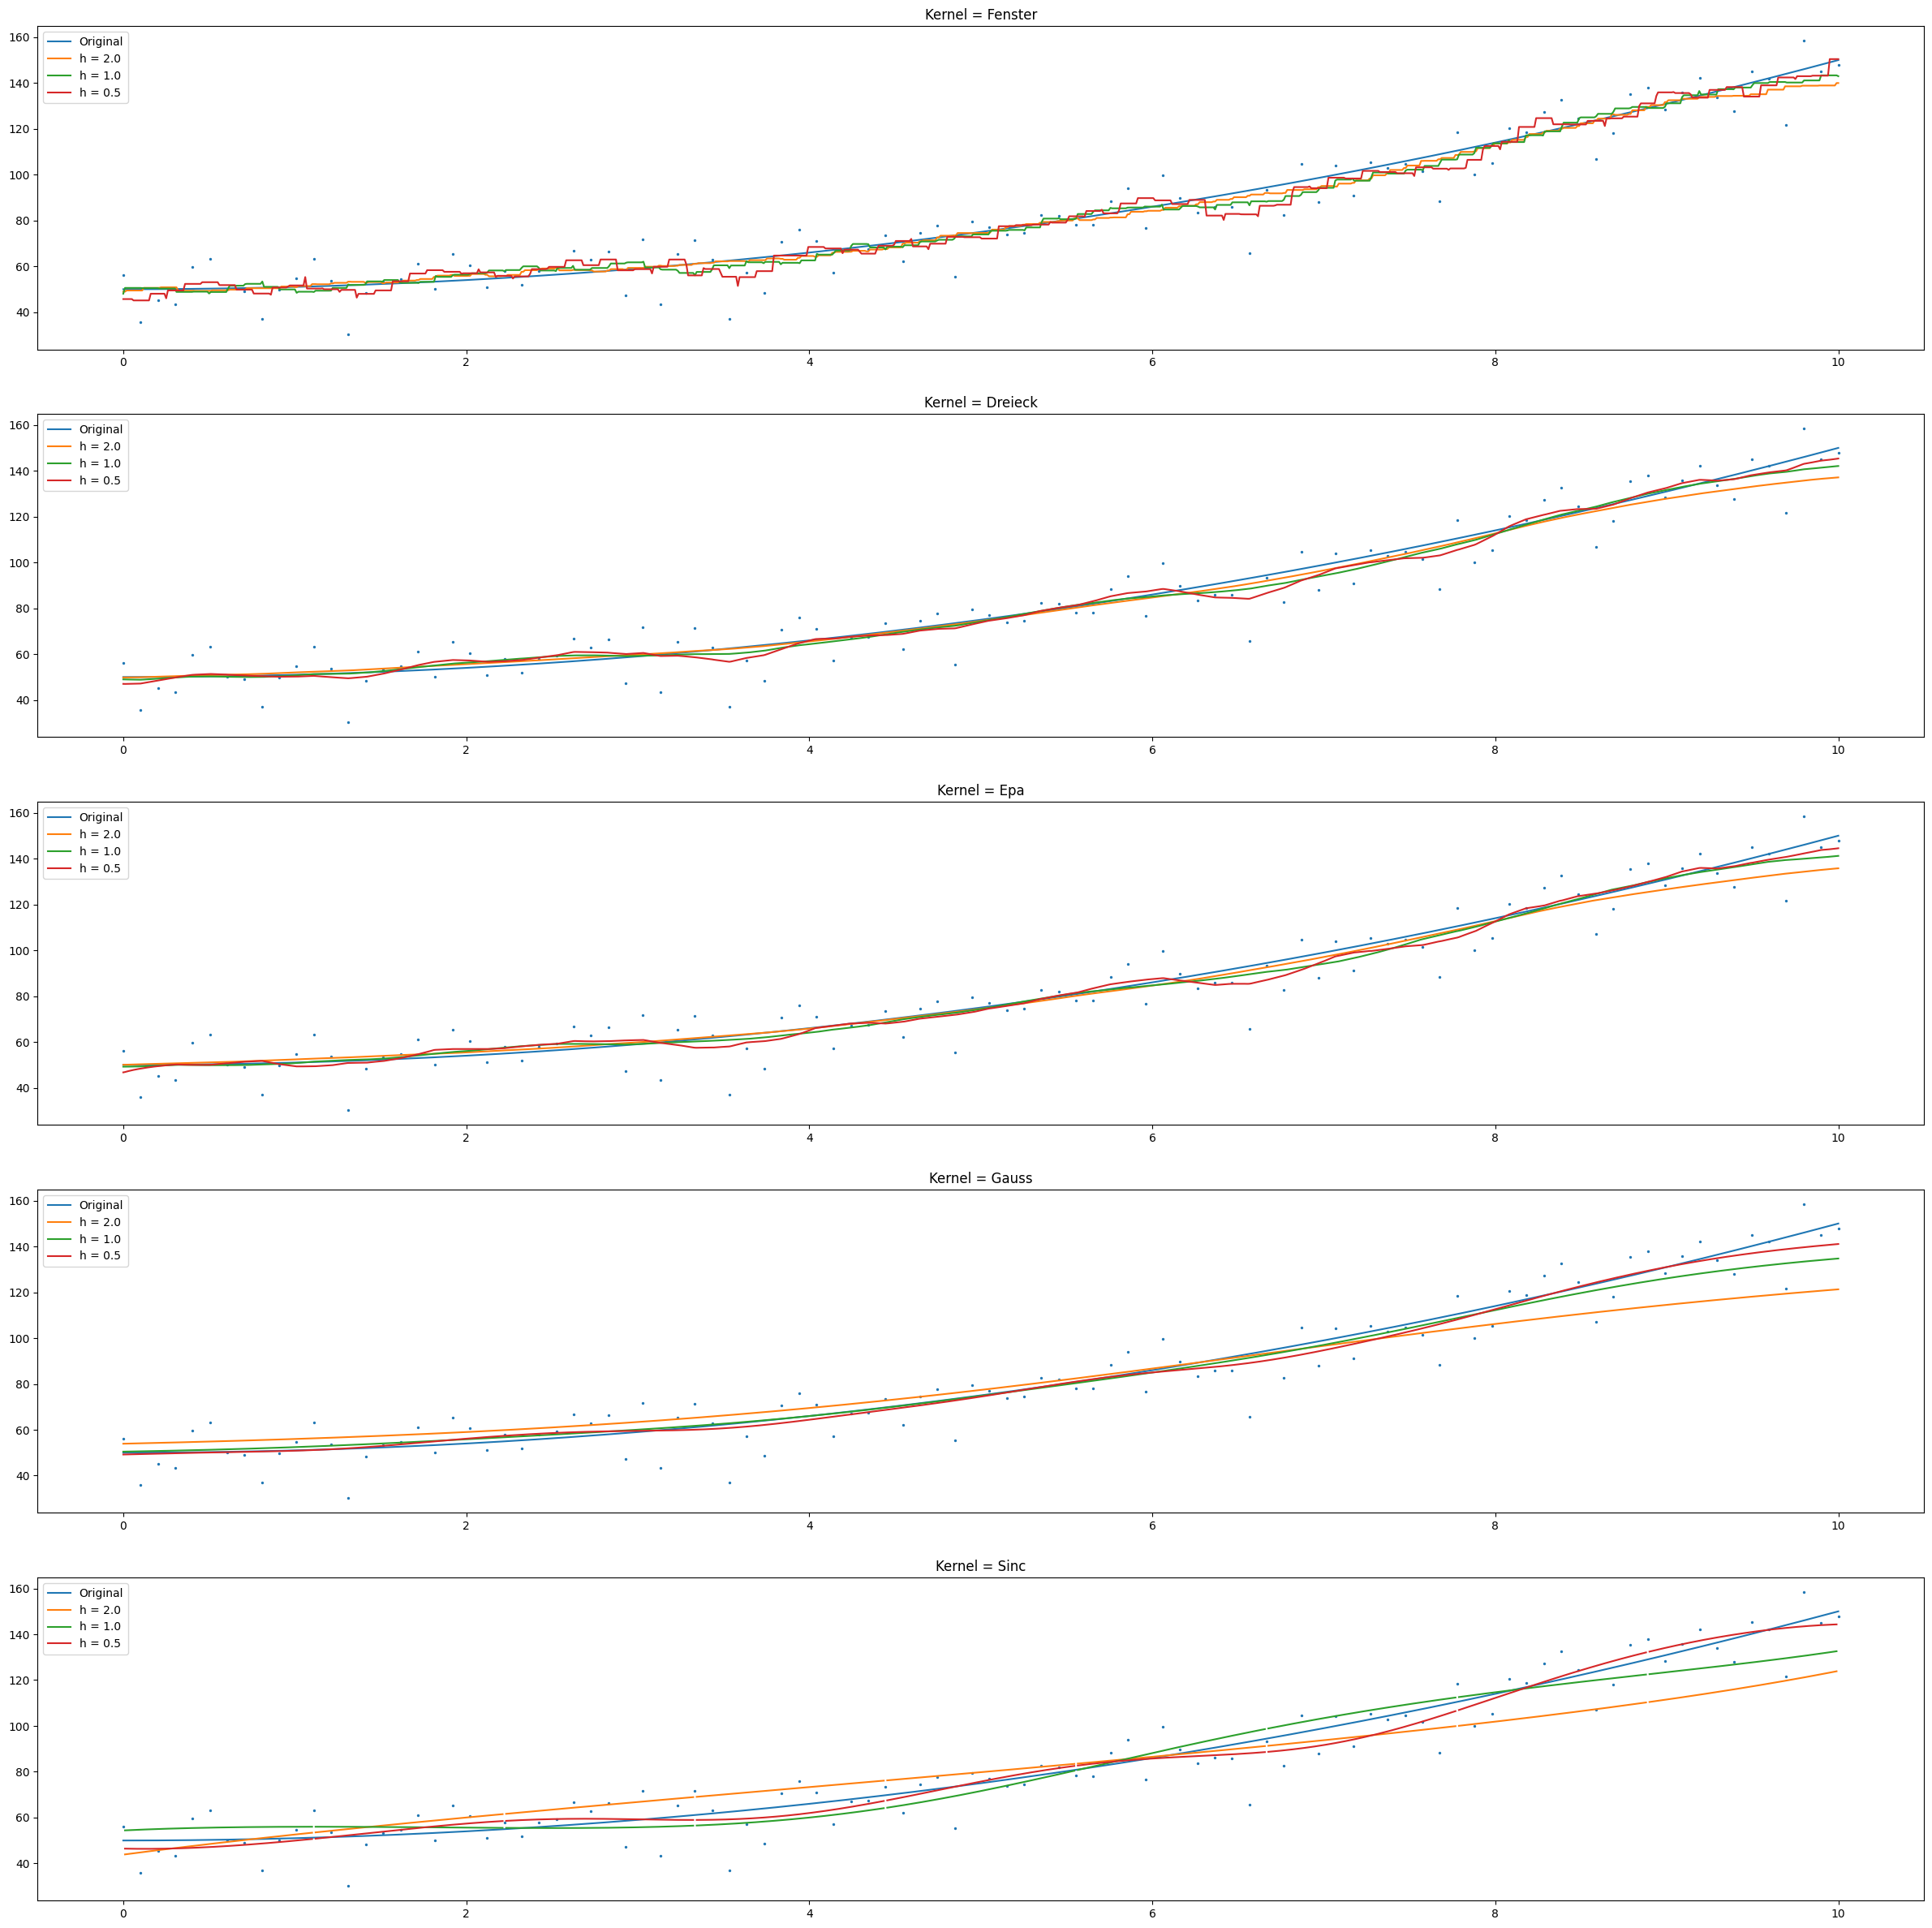

In [30]:
def f_estimator(x,h, kernel_type = 'Fenster'):
    nominator = 0
    denominator = 0
    for i in range(Number_samples):
        if kernel_type == 'Fenster':
           nominator += Y[i] * K_Fenster(x - X[i],h) 
           denominator += K_Fenster(x - X[i],h)
        elif kernel_type == 'Dreieck':
           nominator += Y[i] * K_Dreieck(x - X[i],h) 
           denominator += K_Dreieck(x - X[i],h)
        elif kernel_type == 'Epa':
           nominator += Y[i] * K_Epa(x - X[i],h) 
           denominator += K_Epa(x - X[i],h)
        elif kernel_type == 'Gauss':
           nominator += Y[i] * K_Gauß(x - X[i],h) 
           denominator += K_Gauß(x - X[i],h)
        elif kernel_type == 'Sinc':
           nominator += Y[i] * K_sinc(x - X[i],h) 
           denominator += K_sinc(x - X[i],h)
        else:
            raise ValueError("Invalid kernel type. Choose from 'Fenster', 'Dreieck', 'Epa', 'Gauss'  or 'Sinc'.")

    return nominator/denominator

h = np.array([2,1,0.5])
kernel = ['Fenster', 'Dreieck', 'Epa', 'Gauss', 'Sinc']
plt.figure(figsize=(30,30))

x = np.linspace(min(X),max(X),1000)
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.scatter(X,Y, s=2)
    plt.plot(x, x**2 + 50, label= 'Original')
    for j in range(len(h)):
        plt.plot(x,f_estimator(x,h[j],kernel_type= kernel[i]), label = f"h = {h[j]}")
    plt.title(f"Kernel = {kernel[i]}")
    plt.legend()

C:\Users\simon\AppData\Local\Temp\ipykernel_2468\3791353751.py:14: RuntimeWarning: invalid value encountered in divide
  return 1/(h*np.pi) * (np.sin(x/h)/(x/h))


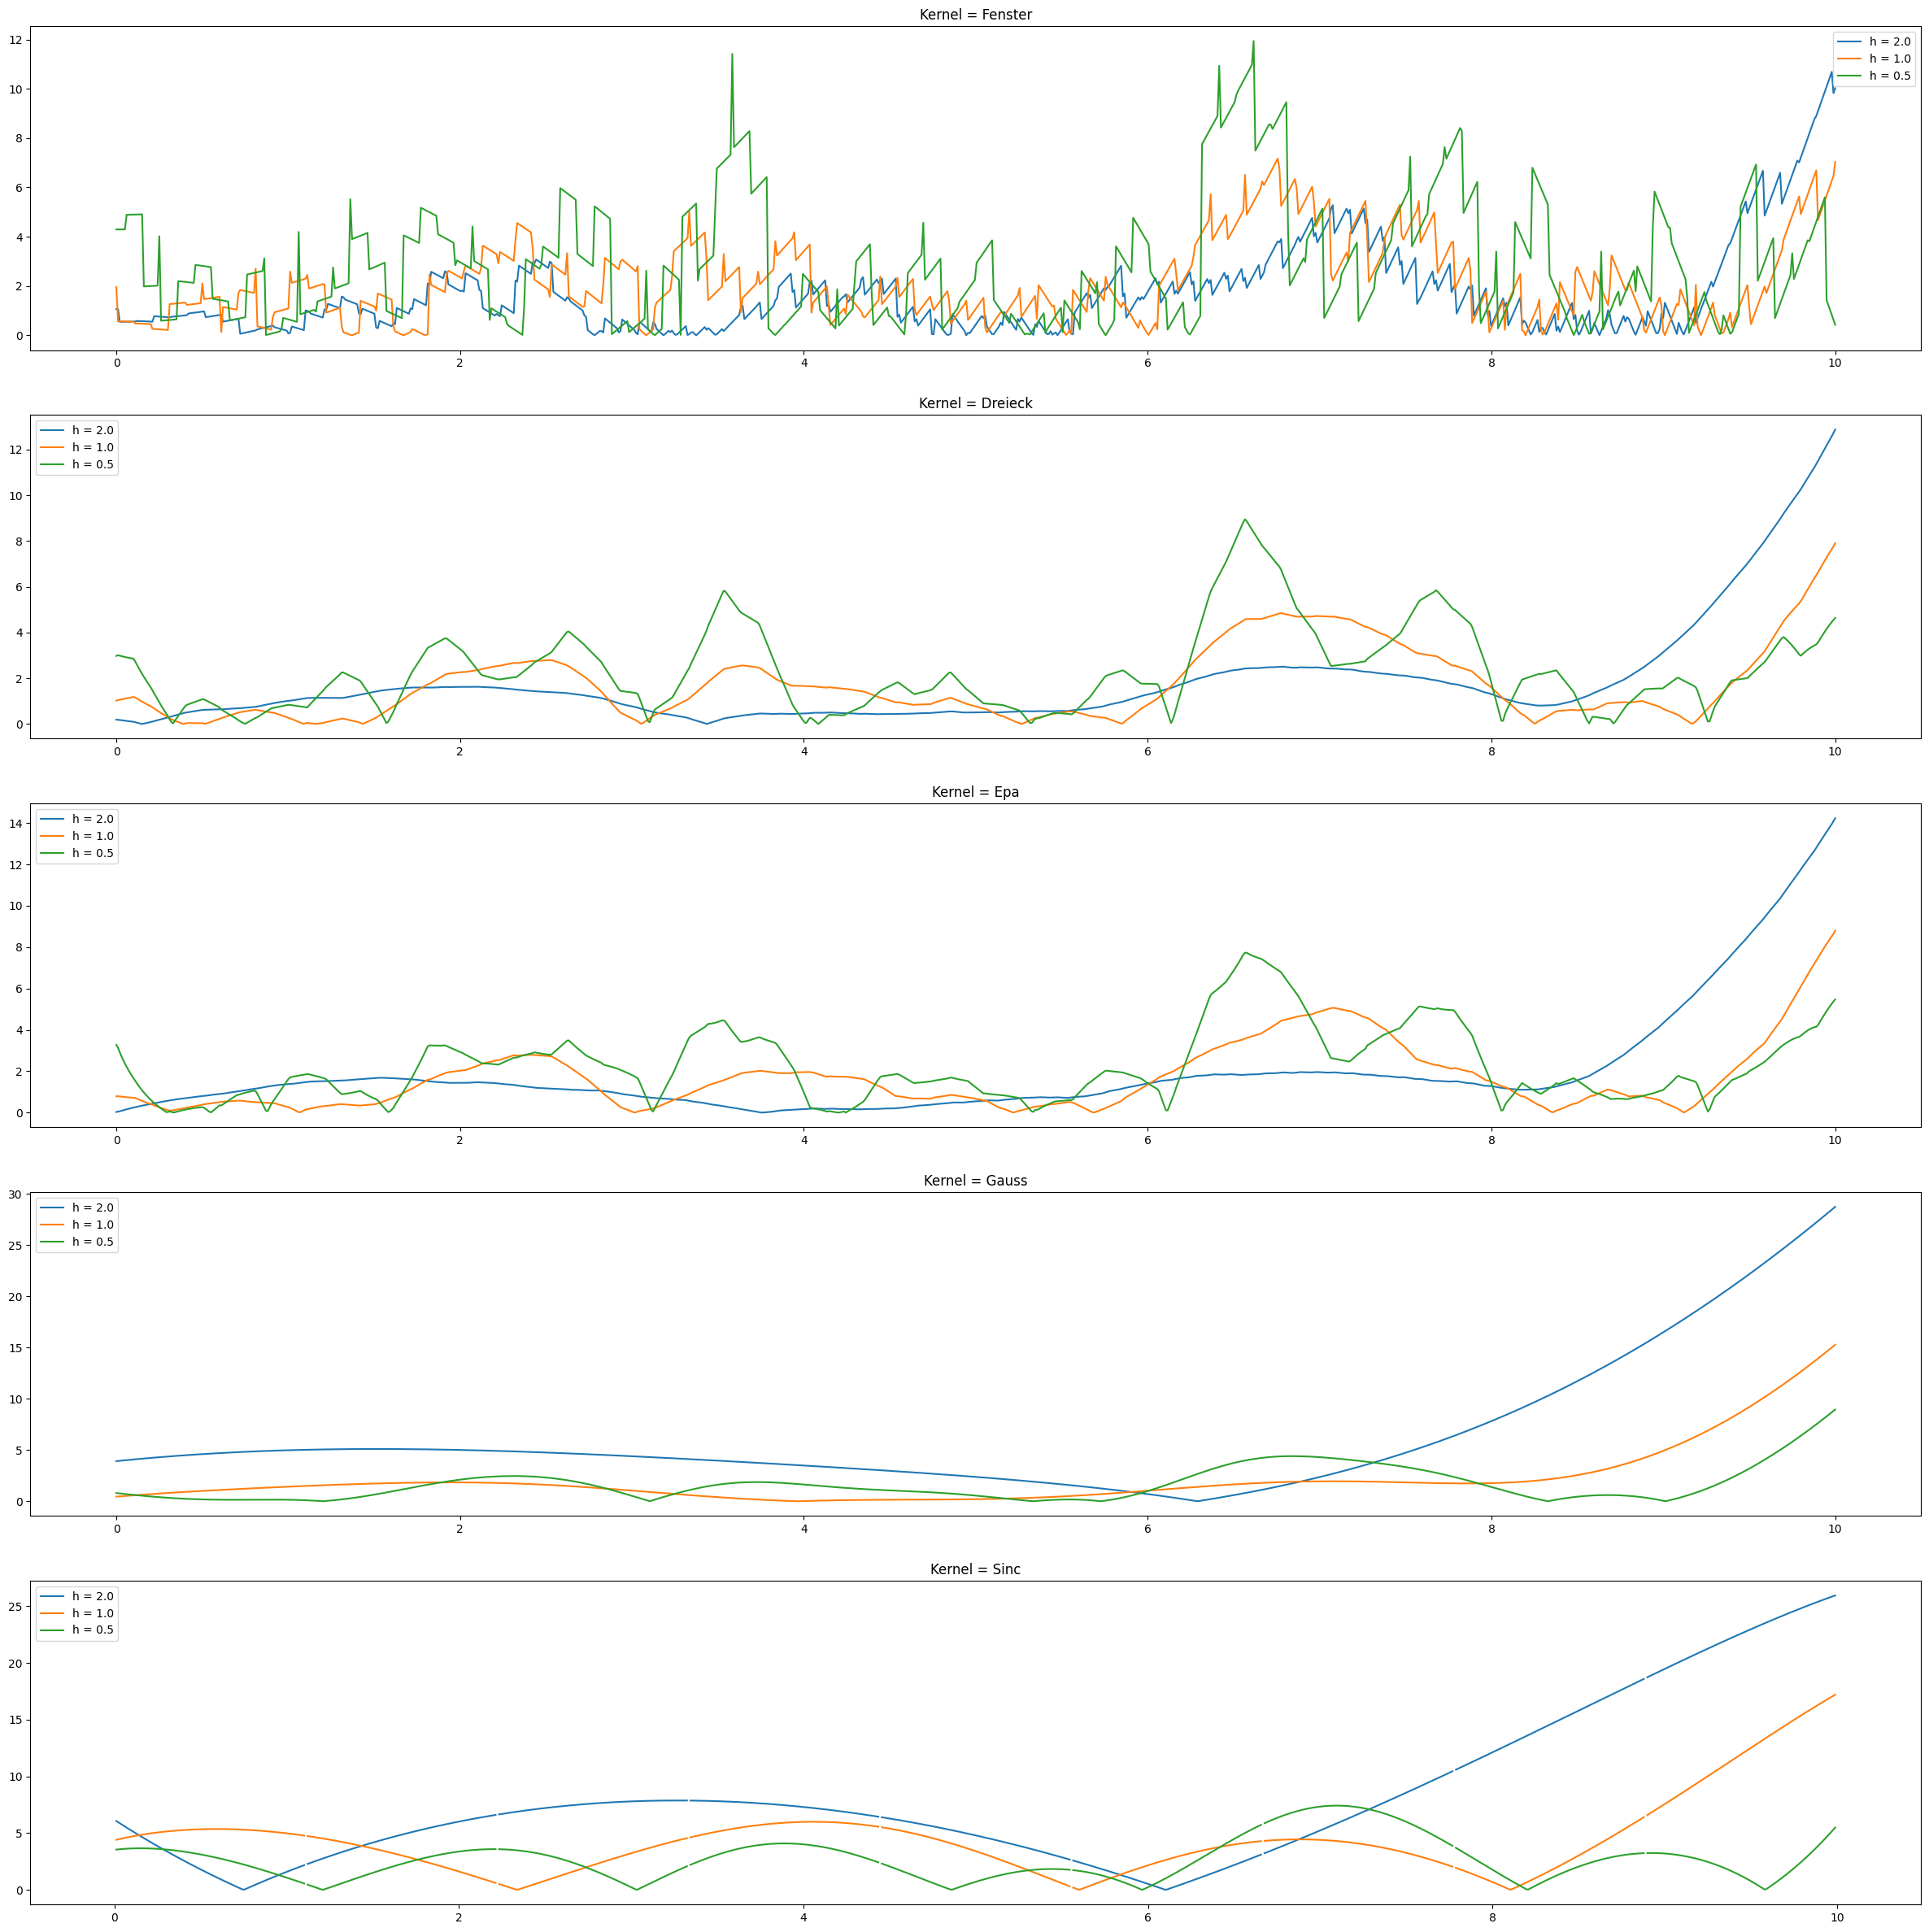

In [33]:
# Plot the Error from originalfunction to Estimator

h = np.array([2,1,0.5])
kernel = ['Fenster', 'Dreieck', 'Epa', 'Gauss', 'Sinc']
plt.figure(figsize=(30,30))

x = np.linspace(min(X),max(X),1000)
for i in range(5):
    plt.subplot(5,1,i+1)
    for j in range(len(h)):
        plt.plot(x,np.abs((x**2 + 50) - f_estimator(x,h[j],kernel_type= kernel[i])), label = f"h = {h[j]}")
    plt.title(f"Kernel = {kernel[i]}")
    plt.legend()

The next thing is to plot the kernel estimator for the given points

The next idea is to implement the more general Nadaraya-Watson estimator. It is given by

$ \hat{f_{nh}}(x) = \arg \min_{y \in \mathbb{R}} (\sum_{i=1}^{n}(Y_{i} - y )^{2}K_{h}(x-x_{i})) $

In [34]:
def f_estimator_min(x,h, kernel_type = 'Fenster'):
    if kernel_type == 'Fenster':
            
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - y_obj)**2 *  K_Fenster(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = 0.0, args=(xi))
            results.append(result.x[0])
        return np.array(results)
    
    elif kernel_type == 'Dreieck':
        
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - y_obj)**2 *  K_Dreieck(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = 0.0, args=(xi))
            results.append(result.x[0])
        return np.array(results)
    
    elif kernel_type == 'Epa':
        
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - y_obj)**2 *  K_Epa(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = 0.0, args=(xi))
            results.append(result.x[0])
        return np.array(results)
    elif kernel_type == 'Gauss':
        
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - y_obj)**2 *  K_Gauß(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = 0.0, args=(xi))
            results.append(result.x[0])
        return np.array(results)
    
    else:
        raise ValueError("Invalid kernel type. Choose from 'Fenster', 'Dreieck', 'Epa', or 'Gauss'.")

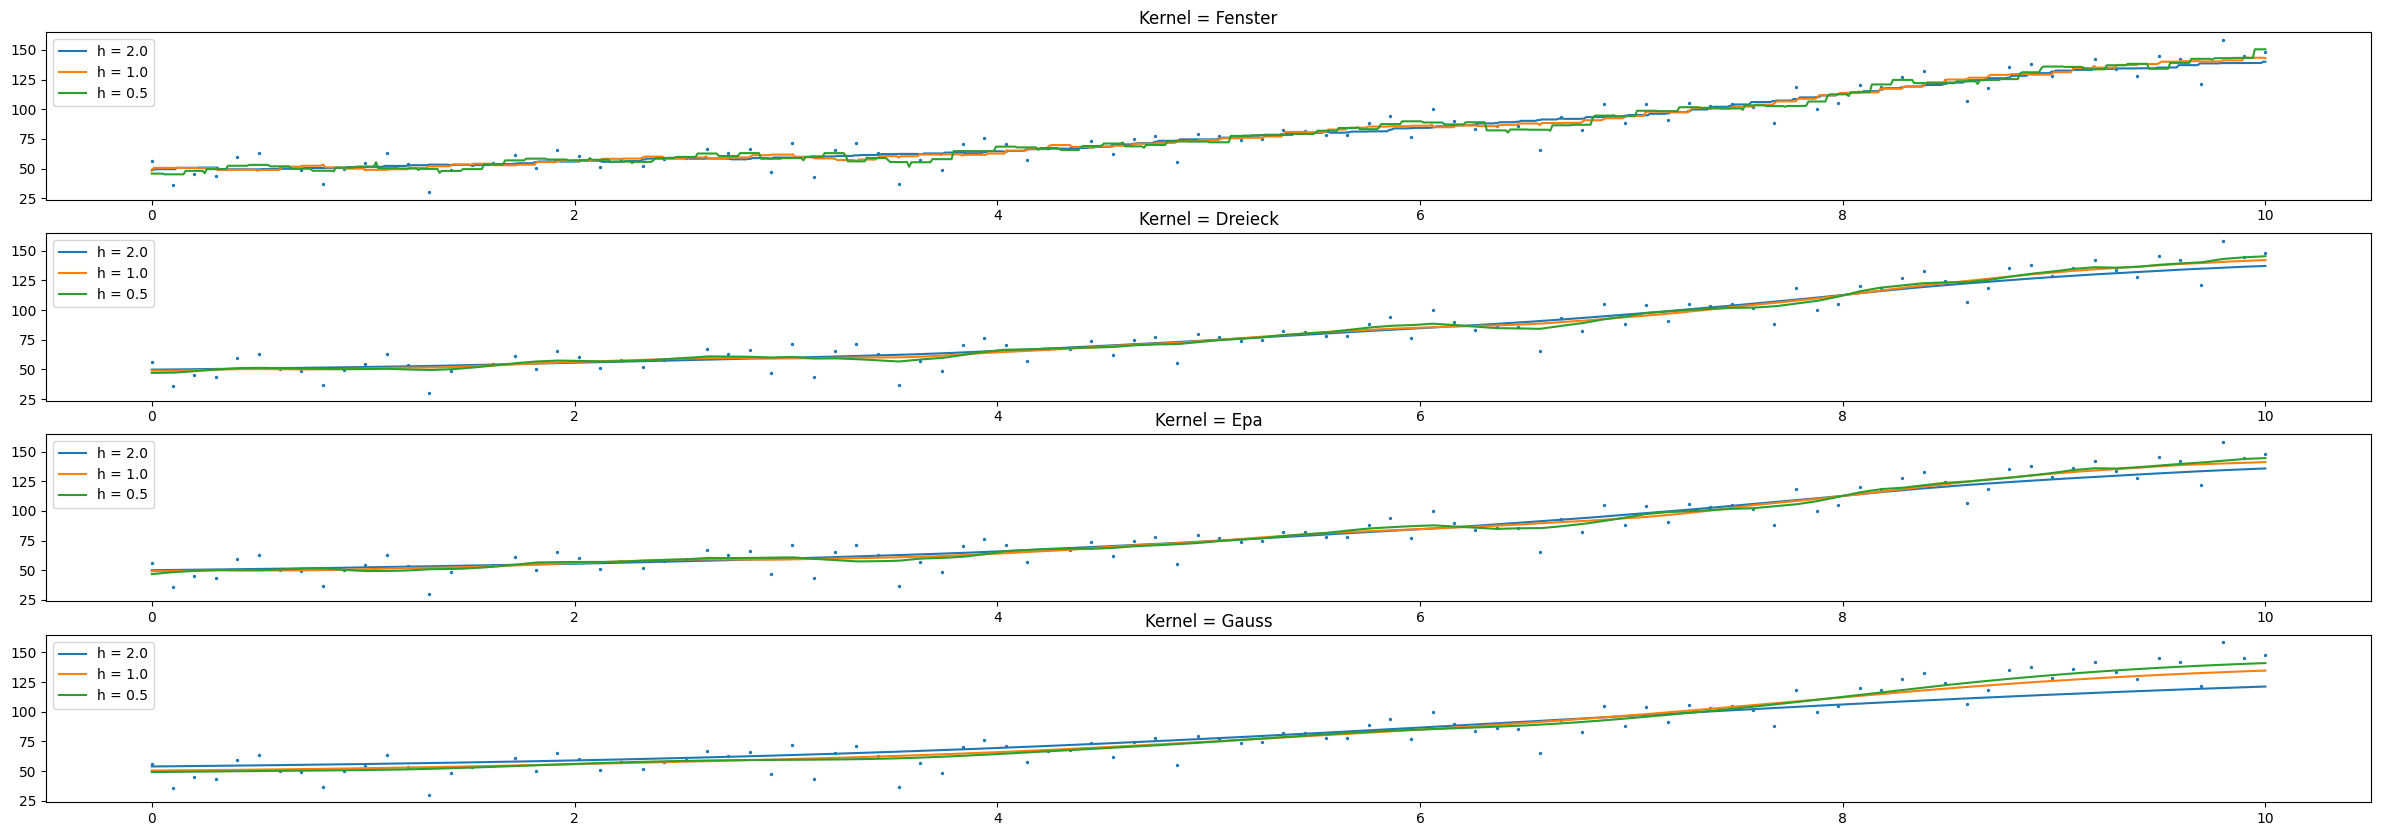

In [38]:
h = np.array([2,1,0.5])
kernel = ['Fenster', 'Dreieck', 'Epa', 'Gauss']
plt.figure(figsize=(30,10))

x = np.linspace(min(X),max(X),1000)
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(X,Y, s=2)
    for j in range(len(h)):
        plt.plot(x,f_estimator_min(x,h[j],kernel_type = kernel[i]), label = f"h = {h[j]}")
    plt.title(f"Kernel = {kernel[i]}")
    plt.legend()


Now we can visualize the more general version of the Nadaraya-Watson estimator.

In [39]:
def P(x,m):
    pol = []
    for i in range(m+1):
        pol.append(x**i)
    return pol


def f_estimator_min(x,h,m, kernel_type = 'Fenster'):
    if kernel_type == 'Fenster':
            
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - np.dot(y_obj, P((X[i] - x_obj)/h,m)))**2 *  K_Fenster(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = np.zeros(m+1), args=(xi))
            results.append(result.x[0])
        return np.array(results)
    
    elif kernel_type == 'Dreieck':
        
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - np.dot(y_obj, P((X[i] - x_obj)/h,m)))**2 *  K_Dreieck(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = np.zeros(m+1), args=(xi))
            results.append(result.x[0])
        return np.array(results)
    
    elif kernel_type == 'Epa':
        
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - np.dot(y_obj, P((X[i] - x_obj)/h,m)))**2 *  K_Epa(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = np.zeros(m+1), args=(xi))
            results.append(result.x[0])
        return np.array(results)
    elif kernel_type == 'Gauss':
        
        def objective_function(y_obj,x_obj):
            sum = 0
            for i in range(Number_samples):
                sum += (Y[i] - np.dot(y_obj, P((X[i] - x_obj)/h,m)))**2 *  K_Gauß(x_obj - X[i],h)
            return sum
        
        results = []
        for xi in x:
            result = minimize(objective_function, x0 = np.zeros(m+1), args=(xi))
            results.append(result.x[0])
        return np.array(results)
    
    else:
        raise ValueError("Invalid kernel type. Choose from 'Fenster', 'Dreieck', 'Epa', or 'Gauss'.")
    


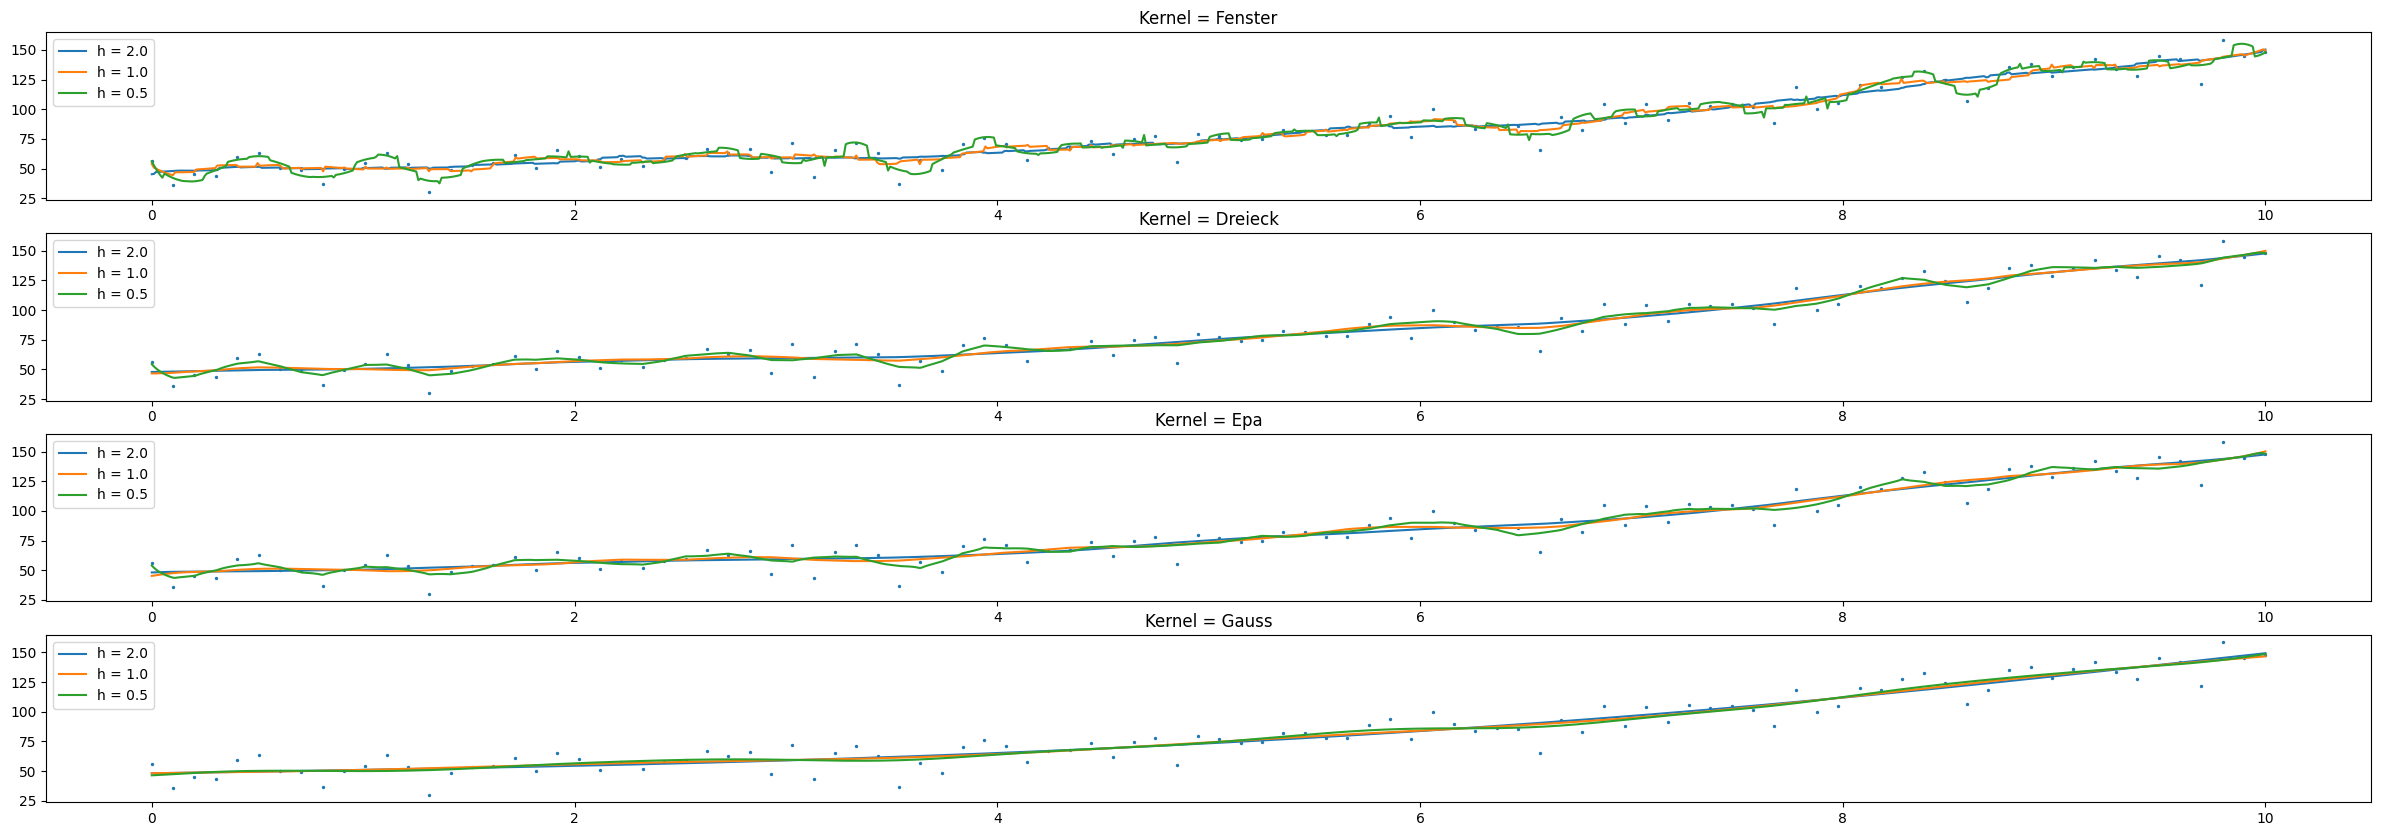

In [40]:
h = np.array([2,1,0.5])
m = 2
kernel = ['Fenster', 'Dreieck', 'Epa', 'Gauss']
plt.figure(figsize=(30,10))

x = np.linspace(min(X),max(X),1000)
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(X,Y, s=2)
    for j in range(len(h)):
        plt.plot(x,f_estimator_min(x,h[j],m,kernel_type = kernel[i]), label = f"h = {h[j]}")
    plt.title(f"Kernel = {kernel[i]}")
    plt.legend()

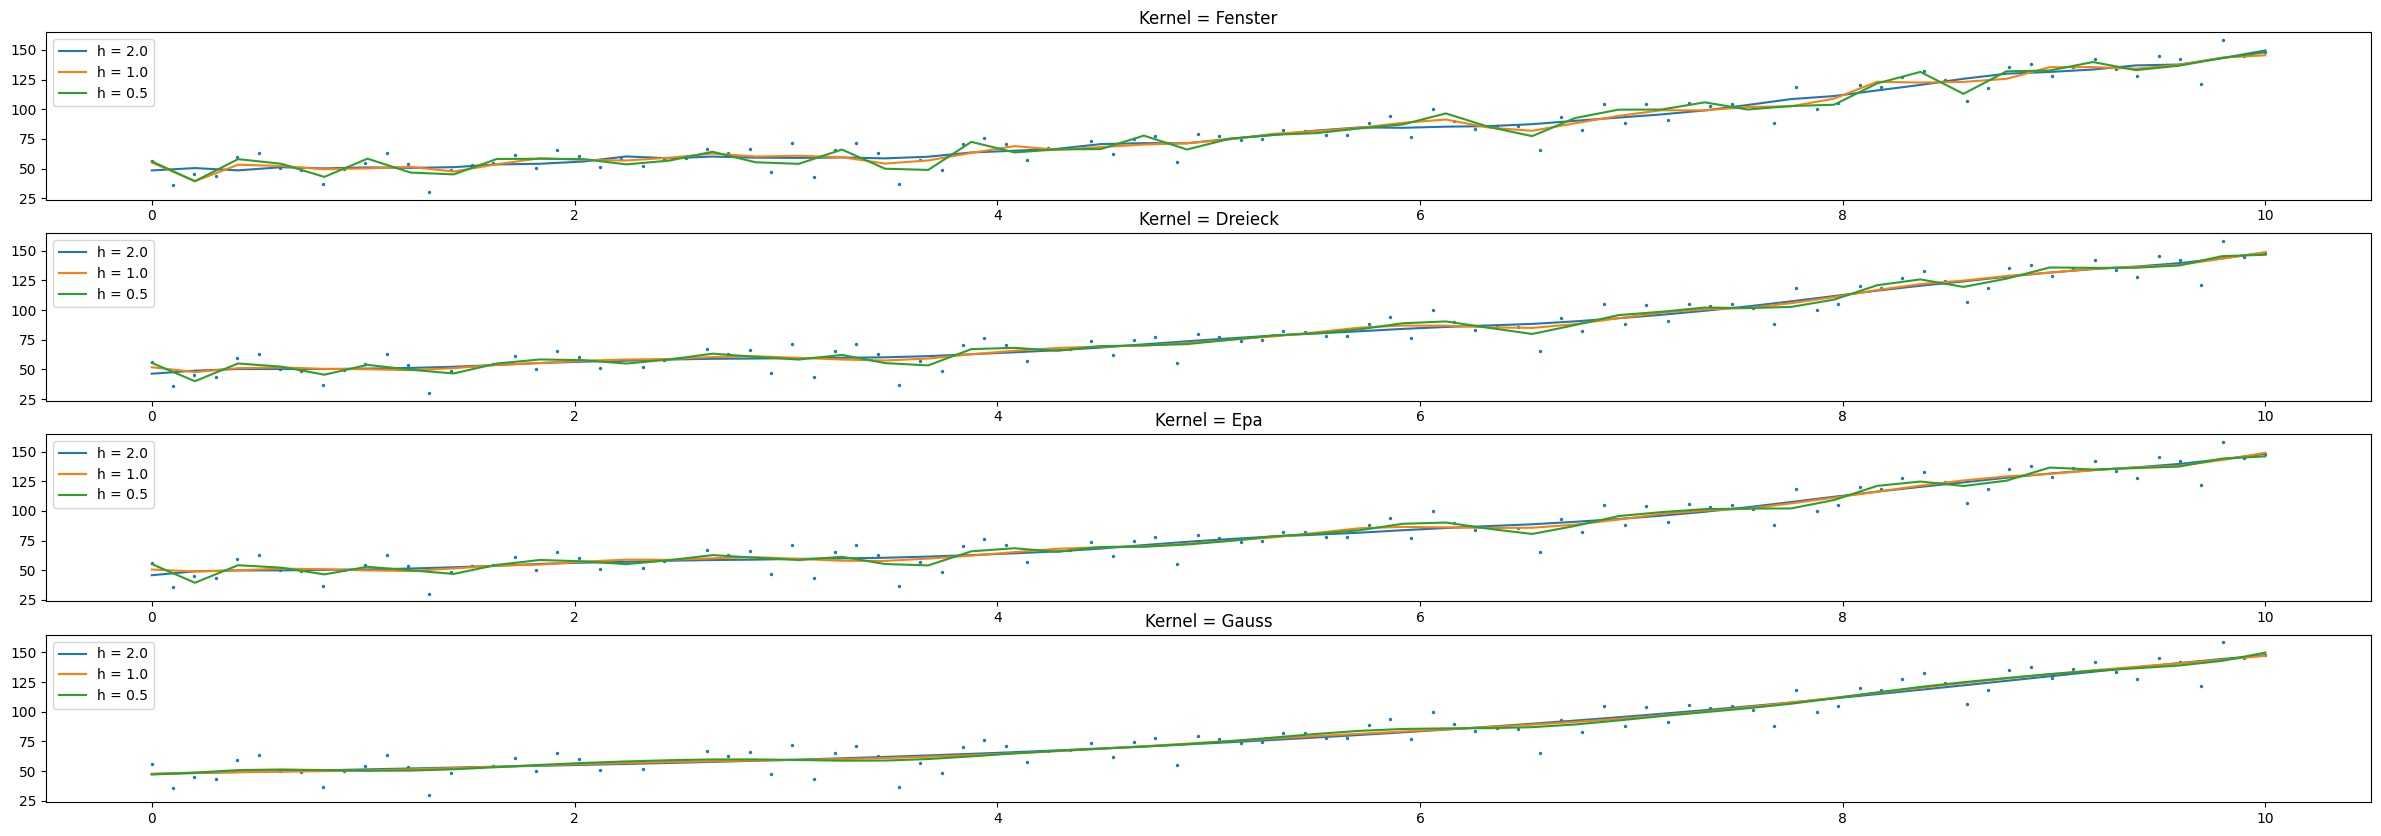

In [42]:
h = np.array([2,1,0.5])
m = 3
kernel = ['Fenster', 'Dreieck', 'Epa', 'Gauss']
plt.figure(figsize=(30,10))

x = np.linspace(min(X),max(X))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(X,Y, s=2)
    for j in range(len(h)):
        plt.plot(x,f_estimator_min(x,h[j],m,kernel_type = kernel[i]), label = f"h = {h[j]}")
    plt.title(f"Kernel = {kernel[i]}")
    plt.legend()

The idea is to implement now a local polynomial estimator.

In [43]:
m = 2

# Define the polynomial for with maximal exponent m-1
def P(x):
    output = np.zeros(len(x))
    for _ in range(len(x)):
        result_array = np.array([])
        for i in range(m+1):
            result_array = np.append(result_array,x**i)
            print(result_array)
        output = np.append(output,result_array)
    return output

P(np.array([1,1]))
print(P)


# Define the local polynomial estimator
def f_local_polynomial_estimator(x,h):
    result_total = np.zeros(len(x))
    for i in range(0, len(x)):
        
        def objective_function(theta):
            return sum((Y-np.dot(theta,P(X-x[i])))**2 * K_Fenster(x[i]-X,h))
        
        result = minimize(objective_function, x0 = np.ones(m+1))
        result_total[i] = np.dot(result.x[0],P(0)) # Just the first component
        
    
    return result_total

[1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
<function P at 0x0000014C362D5580>


ValueError: shapes (3,) and (150,) not aligned: 3 (dim 0) != 150 (dim 0)

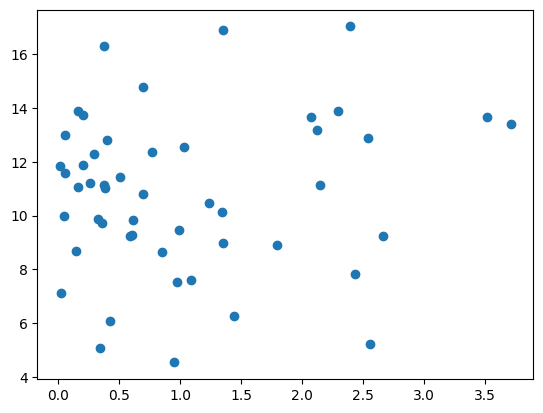

In [101]:
plt.scatter(X,Y)
x = np.linspace(min(X),max(X))
for i in range(len(h)):
    plt.plot(x,f_local_polynomial_estimator(x,h[i]), label = f"h = {h[i]}")
plt.legend()